# HW02 (due October 12th)

In this homework you will investigate the *causal* of being part of a union on the number of hours worked. You will work with data from the National Longitudinal Survey. In particular, you have a panel of young women who were between 14 and 26 years of age in 1968, surveyed for 20 years.

The purpose of this homework is ot make you think about the **identification** assumptions underlying your empirical strategy, namely the assumptions that allow the coefficient estimate from the regressions to be causal. Throughout the homework you will try to address the issue of **omitted variable bias** through different strategies, that will allow to make milder identification assumptions.

# Load Data

In [22]:
##Load the NLSY dataset
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

data = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta')
data_labels = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta', iterator=True).variable_labels()

#  Summary statistics

Inspect the data.

In [23]:
##Visualize the dataset
data.head(20)

,idcode,year,birth_yr,age,race,msp,nev_mar,grade,collgrad,not_smsa,...,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
0,1,70,51,18.0,black,0.0,1.0,12.0,0,0.0,...,0.0,6.0,3.0,NaN,2.0,1.083333,0.083333,20.0,27.0,1.451214
1,1,71,51,19.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,NaN,22.0,1.275641,0.083333,44.0,10.0,1.028620
2,1,72,51,20.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,1.0,0.0,2.256410,0.916667,40.0,51.0,1.589977
3,1,73,51,21.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,NaN,0.0,2.314102,0.083333,40.0,3.0,1.780273
4,1,75,51,23.0,black,1.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,NaN,0.0,2.775641,0.166667,10.0,24.0,1.777012
5,1,77,51,25.0,black,0.0,0.0,12.0,0,0.0,...,0.0,12.0,8.0,0.0,0.0,3.775641,1.500000,32.0,52.0,1.778681
6,1,78,51,26.0,black,0.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,NaN,7.0,3.852564,0.083333,52.0,4.0,2.493976
7,1,80,51,28.0,black,0.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,1.0,0.0,5.294872,1.833333,45.0,75.0,2.551715
8,1,83,51,31.0,black,0.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,1.0,NaN,5.294872,0.666667,49.0,101.0,2.420261
9,1,85,51,33.0,black,0.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,1.0,0.0,7.160256,1.916667,42.0,97.0,2.614172


In [24]:
data_labels

{'idcode': 'NLS ID',
 'year': 'interview year',
 'birth_yr': 'birth year',
 'age': 'age in current year',
 'race': 'race',
 'msp': '1 if married, spouse present',
 'nev_mar': '1 if never married',
 'grade': 'current grade completed',
 'collgrad': '1 if college graduate',
 'not_smsa': '1 if not SMSA',
 'c_city': '1 if central city',
 'south': '1 if south',
 'ind_code': 'industry of employment',
 'occ_code': 'occupation',
 'union': '1 if union',
 'wks_ue': 'weeks unemployed last year',
 'ttl_exp': 'total work experience',
 'tenure': 'job tenure, in years',
 'hours': 'usual hours worked',
 'wks_work': 'weeks worked last year',
 'ln_wage': 'ln(wage/GNP deflator)'}

In [25]:
data.describe()

,idcode,year,birth_yr,age,msp,nev_mar,grade,collgrad,not_smsa,c_city,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
count,28534.000000,28534.000000,28534.000000,28510.000000,28518.000000,28518.000000,28532.000000,28534.000000,28526.000000,28526.000000,28526.000000,28193.000000,28413.000000,19238.000000,22830.000000,28534.000000,28101.000000,28467.000000,27831.000000,28534.000000
mean,2601.284292,77.958646,48.085091,29.045107,0.602917,0.229680,12.532595,0.168045,0.282444,0.357218,0.409556,7.692973,4.777672,0.234432,2.548095,6.215316,3.123836,36.559560,53.989328,1.674907
std,1487.358947,6.383879,3.012837,6.700584,0.489302,0.420634,2.323905,0.373913,0.450196,0.479188,0.491761,2.994025,3.065435,0.423654,7.294463,4.652117,3.751409,9.869623,29.032325,0.478093
min,1.000000,68.000000,41.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1327.000000,72.000000,46.000000,23.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,2.461539,0.500000,35.000000,36.000000,1.361496
50%,2606.000000,78.000000,48.000000,28.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,0.000000,0.000000,5.057693,1.666667,40.000000,52.000000,1.640541
75%,3881.000000,83.000000,51.000000,34.000000,1.000000,0.000000,14.000000,0.000000,1.000000,1.000000,1.000000,11.000000,6.000000,0.000000,0.000000,9.128204,4.166667,40.000000,72.000000,1.964083
max,5159.000000,88.000000,54.000000,46.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,12.000000,13.000000,1.000000,76.000000,28.884615,25.916666,168.000000,104.000000,5.263916


In [26]:
##tabulate college and union status
college_union_data = data[['collgrad', 'union']]
college_union_data.head(10)

,collgrad,union
0,0,NaN
1,0,NaN
2,0,1.0
3,0,NaN
4,0,NaN
5,0,0.0
6,0,NaN
7,0,1.0
8,0,1.0
9,0,1.0


In [27]:
##generate a variable for log hours worked

## Test lambda function 
def hoursToLogHours(row):
    return np.log(row['hours']) 

data.apply (lambda row: hoursToLogHours(row), axis=1)

0        2.995732
1        3.784190
2        3.688879
3        3.688879
4        2.302585
           ...   
28529    3.663562
28530    3.637586
28531    3.637586
28532    3.688879
28533    3.637586
Length: 28534, dtype: float64

OKay seems good, let's add this as a new collumn in the dataframe

In [28]:
data['log_hours'] = data.apply(lambda row: hoursToLogHours(row), axis=1)
data.head()

,idcode,year,birth_yr,age,race,msp,nev_mar,grade,collgrad,not_smsa,...,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage,log_hours
0,1,70,51,18.0,black,0.0,1.0,12.0,0,0.0,...,6.0,3.0,NaN,2.0,1.083333,0.083333,20.0,27.0,1.451214,2.995732
1,1,71,51,19.0,black,1.0,0.0,12.0,0,0.0,...,4.0,6.0,NaN,22.0,1.275641,0.083333,44.0,10.0,1.028620,3.784190
2,1,72,51,20.0,black,1.0,0.0,12.0,0,0.0,...,4.0,6.0,1.0,0.0,2.256410,0.916667,40.0,51.0,1.589977,3.688879
3,1,73,51,21.0,black,1.0,0.0,12.0,0,0.0,...,4.0,6.0,NaN,0.0,2.314102,0.083333,40.0,3.0,1.780273,3.688879
4,1,75,51,23.0,black,1.0,0.0,12.0,0,0.0,...,5.0,6.0,NaN,0.0,2.775641,0.166667,10.0,24.0,1.777012,2.302585


<AxesSubplot: xlabel='year', ylabel='log_hours'>

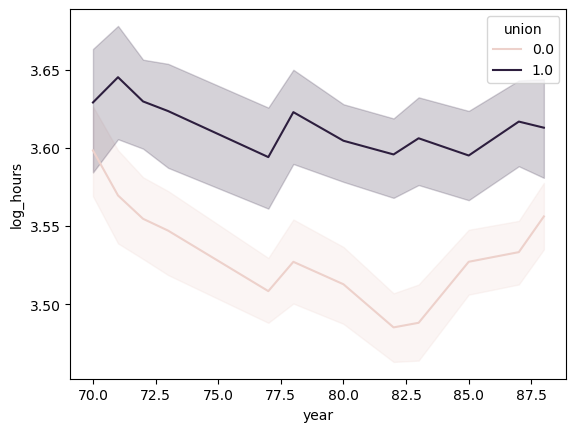

In [29]:
##plot log hours against year separately for union and non-union
import seaborn as sns
sns.lineplot(data=data, x="year", y="log_hours", hue="union")


# Regression: Effect of union status on hours worked

In [18]:
##Regress hours worked against union status and display the results
res = smf.ols("hours ~ union", data = data).fit()

In [19]:
##Print or write out the coefficient on union, standard error, t-stat, p-value and confidence interval
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hours   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     136.6
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           1.85e-31
Time:                        15:20:52   Log-Likelihood:                -70568.
No. Observations:               19202   AIC:                         1.411e+05
Df Residuals:                   19200   BIC:                         1.412e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3112      0.079    461.166      0.000      36.157      36.466
union          1.9006      0.163     11.689      0.000       1.582       2.219
==============================================================================
Omnibus:                     4058.592   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22932.168
Skew:                          -0.900   Prob(JB):                         0.00
Kurtosis:                       8.042   Cond. No.                         2.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### What is the identification assumption for the coefficient on union to be causal?

> The underlaying assumption is that "union" is the the only variable affecting the number of working hours, there are no additional confounding variables.



In [20]:
## add education (collgrad) to the regression and compare the coefficient on union with the previous result
res1 = smf.ols("hours ~ union + collgrad", data = data).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hours   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     145.2
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           2.69e-63
Time:                        15:22:08   Log-Likelihood:                -70492.
No. Observations:               19202   AIC:                         1.410e+05
Df Residuals:                   19199   BIC:                         1.410e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.9239      0.084    425.314      0.000      35.758      36.089
union          1.7661      0.162     10.880      0.000       1.448       2.084
collgrad       2.1420      0.173     12.353      0.000       1.802       2.482
==============================================================================
Omnibus:                     4212.730   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22770.233
Skew:                          -0.952   Prob(JB):                         0.00
Kurtosis:                       7.984   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
## add occupation codes to the regression and compare the results with the previous one
res2 = smf.ols("hours ~ union + occ_code", data = data).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hours   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     70.67
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           2.65e-31
Time:                        15:24:51   Log-Likelihood:                -70290.
No. Observations:               19129   AIC:                         1.406e+05
Df Residuals:                   19126   BIC:                         1.406e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.5560      0.124    294.798      0.000      36.313      36.799
union          1.9686      0.166     11.885      0.000       1.644       2.293
occ_code      -0.0548      0.022     -2.485      0.013      -0.098      -0.012
==============================================================================
Omnibus:                     4013.155   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22869.646
Skew:                          -0.890   Prob(JB):                         0.00
Kurtosis:                       8.052   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### In terms of causal inference, why is adding occupation code as a control probably not a good idea?

> Being part of a union can increase the likelihood of a certain occupation (e.g. sales, clerical/unskilled), and the number of worked hours can depend on the type of occupation. Occupation would thus act as a mediator and as seen in the lectures, we should not control for that.

#### What are "good controls" in the dataset in terms of being exogenous to union status?

> All the age related metrics: "age", "ttl_exp"

In [32]:
##add these controls to the regression
res2 = smf.ols("hours ~ union + age + ttl_exp", data = data).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hours   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     389.6
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.09e-245
Time:                        17:20:41   Log-Likelihood:                -70033.
No. Observations:               19193   AIC:                         1.401e+05
Df Residuals:                   19189   BIC:                         1.401e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.4365      0.384    113.086      0.000      42.684      44.189
union          1.5681      0.159      9.867      0.000       1.257       1.880
age           -0.3800      0.015    -25.707      0.000      -0.409      -0.351
ttl_exp        0.6301      0.020     31.463      0.000       0.591       0.669
==============================================================================
Omnibus:                     3597.479   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24046.390
Skew:                          -0.736   Prob(JB):                         0.00
Kurtosis:                       8.282   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### How do these change your estimates?

Overall they reduce the importance of union, in particular ttl_exp correlates well with hours while age as expeted is negatively correlated. 

# Short Essay: Correlation/Causation

**Find a news article mistaking correlation for causation. Link to the article and write a short paragraph explaining the mistake.**

In this Vox article: "Want to live longer, even if you're poor? Then move to a big city in California." https://www.vox.com/2016/4/13/11420230/life-expectancy-income the author mistakes the finding of an association (correlation) for a causation.
